# ESG Risk Analysis: Insights from S&P 500 Companies

This notebook provides a practical example of working with **ESG (Environmental, Social, and Governance) scores** for S&P 500 companies.  
It is adapted from the [ESG Risk Analysis – Insights from S&P 500 Companies](https://www.kaggle.com/code/mauriciovellasquez/esg-risk-analysis-insights-from-s-p-500-companies) notebook on Kaggle.

The goal is to use this dataset as a **hands-on exercise** to:
- **Read data files** into Python using `pandas`.
- **Organise and clean data** for analysis using `pandas`.
- **Perform basic descriptive statistics**.
- **Visualise ESG metrics** using `matplotlib` and `seaborn`.

> This example is intended as **practice** for essential data analysis workflows in Python and does not aim to provide deep financial or ESG insights.

# Import the required libraries
Note: You will need to have these installed first:

```python
!pip install LIBRARYNAME
```
or, if you already installed it, but there is a newer version available
```python
!pip install --upgrade LIBRARYNAME
```

In [35]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from file

In [36]:
data = pd.read_csv('data/SP 500 ESG Risk Ratings.csv')
print(f"Shape of the dataset: {data.shape}")
data.head()

Shape of the dataset: (503, 15)


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


## ESG Parameters
In the world of ESG risk analysis, certain parameters stand as beacons, illuminating a company's ethical journey:

- **Environmental Risk Score**: Quantifies a company's ecological responsibility and impact, reflecting its commitment to safeguarding the planet.
- **Governance Risk Score**: Evaluates the transparency, ethics, and quality of corporate governance, influencing long-term viability.
- **Social Risk Score**: Measures a company's societal contributions, spanning employee welfare, diversity, and community engagement.
- **Controversy Level**: A nuanced gauge ranging from "Low" to "High," gauging public or legal controversies linked to the company.
- **Controversy Score**: Numerically quantifies the intensity of controversies, offering insights into reputational risks.

In [37]:
data.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,430.000000,430.000000,430.000000,430.000000,403.000000
mean,21.533721,5.739767,6.725116,9.070465,2.007444
std,6.889176,5.092421,2.208085,3.657924,0.793283
min,7.100000,0.000000,3.000000,0.800000,1.000000
25%,16.400000,1.800000,5.300000,6.700000,1.000000
50%,21.050000,4.050000,6.100000,8.900000,2.000000
75%,26.000000,8.950000,7.675000,11.200000,2.000000
max,41.700000,25.000000,19.400000,22.500000,5.000000


# Sector-wise ESG Risk Analysis

The analysis focuses on understanding the ESG (Environmental, Social, and Governance) risk landscape across various industry sectors.

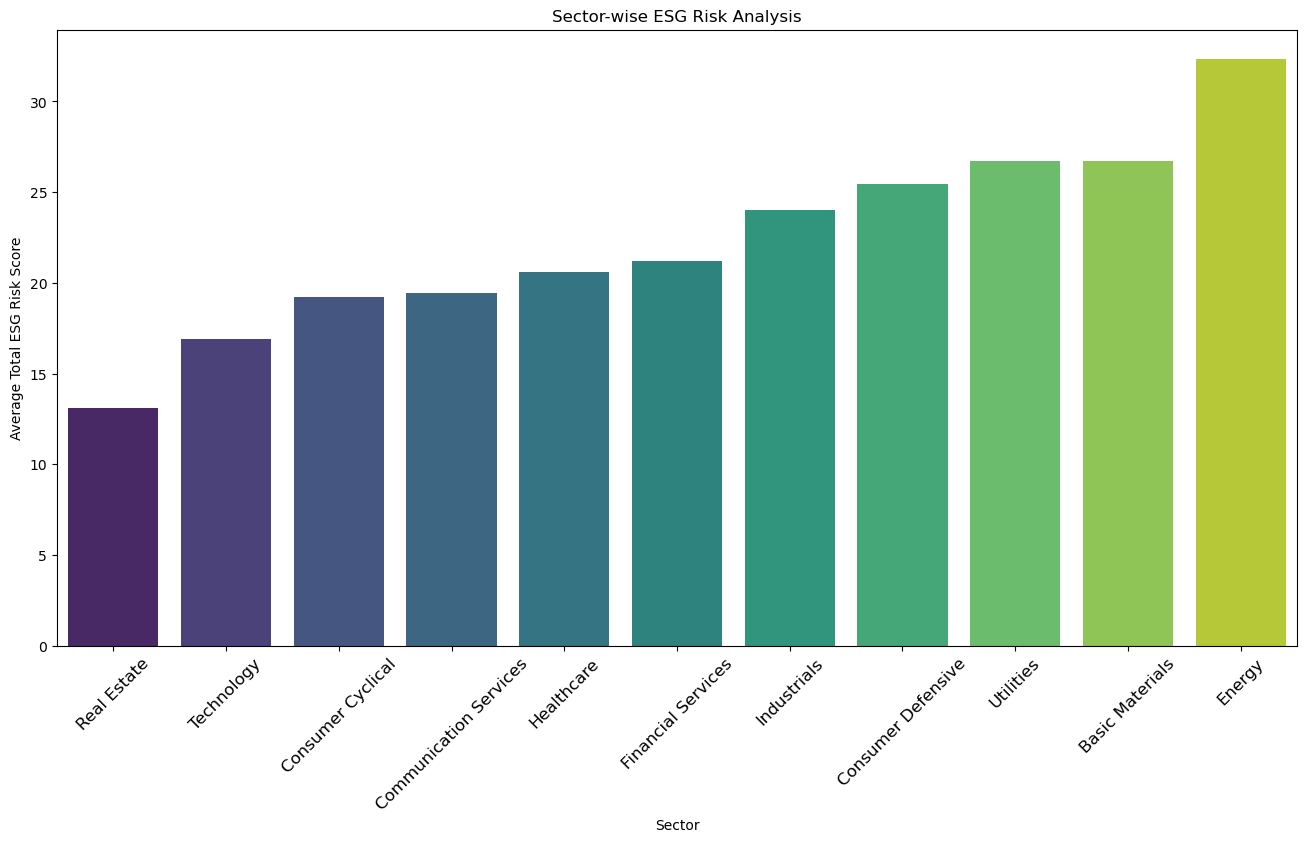

In [38]:
# Group the data by 'Sector' and calculate the mean for 'Total ESG Risk score'
sector_wise_risk = data.groupby('Sector')['Total ESG Risk score'].mean().sort_values()
#sector_wise_risk = data.groupby('Industry')['Total ESG Risk score'].mean().sort_values()    # Try sorting by Industry instead of Sector

# Create a bar plot for the sector-wise average ESG risk scores
plt.figure(figsize=(16, 8))
sns.barplot(x=sector_wise_risk.index, y=sector_wise_risk.values, palette='viridis')
plt.xticks(rotation=45, fontsize=12)
#plt.xticks(rotation=90, fontsize=8)                                                         # if you have too many bars to plot, tweak fontsize and text angle on the x-axis labels
plt.title('Sector-wise ESG Risk Analysis')
plt.xlabel('Sector')
plt.ylabel('Average Total ESG Risk Score')
plt.show()

The analysis reveals key insights that are instrumental for making informed investment decisions. Sectors like Real Estate, Technology, and Consumer Cyclical demonstrate lower average ESG risk scores—13.1, 16.9, and 18.8 respectively—making them potentially safer havens for ESG-conscious investments. This is in contrast to Energy, Utilities, and Basic Materials sectors, which show significantly higher average ESG risks of 33.15, 27.75, and 27.42, signaling that investments in these sectors could be subject to higher ESG scrutiny and volatility.

For decision-makers, these figures act as a preliminary screening tool. A lower average ESG risk score could indicate a generally more responsible industry in terms of environmental, social, and governance factors. On the flip side, sectors with high average ESG risk scores necessitate a careful, nuanced approach. Diving deeper into company-specific scores within these sectors could unearth opportunities where the ESG risks are well-managed despite the broader sector trends. In essence, the sector-wise ESG risk breakdown offers a roadmap for both risk-averse and risk-tolerant investment strategies.

## Customize it a little...
What if you want to rank the sectors by specific **pillar** instead of by **aggregate ESG** score?

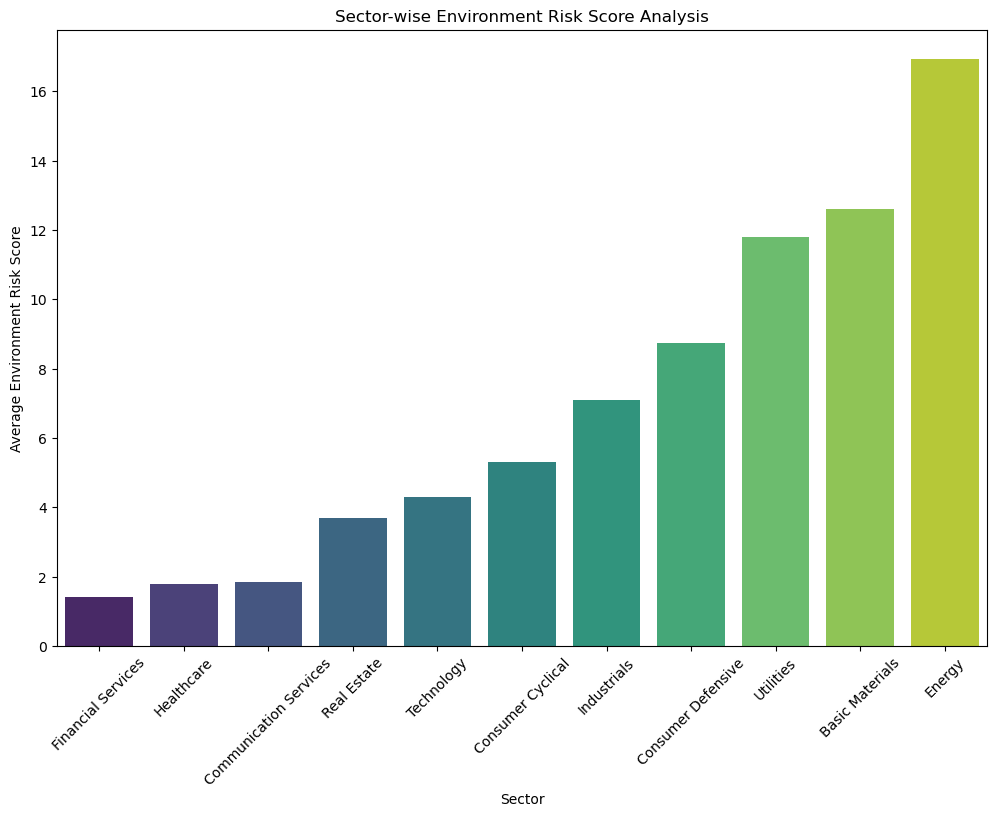

In [39]:
# Select a specific score to analyse:
# Total ESG Risk score 	Environment Risk Score 	Governance Risk Score 	Social Risk Score 	Controversy Score
scoreID = 'Environment Risk Score'

# Group the data by 'Sector' and calculate the mean for 'Total ESG Risk score'
sector_wise_risk = data.groupby('Sector')[scoreID].mean().sort_values()

# Create a bar plot for the sector-wise average ESG risk scores
plt.figure(figsize=(12, 8))
sns.barplot(x=sector_wise_risk.index, y=sector_wise_risk.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Sector-wise ' + scoreID + ' Analysis')
plt.xlabel('Sector')
plt.ylabel('Average '+scoreID)
plt.show()

# Top Performers by ESG Risk Level

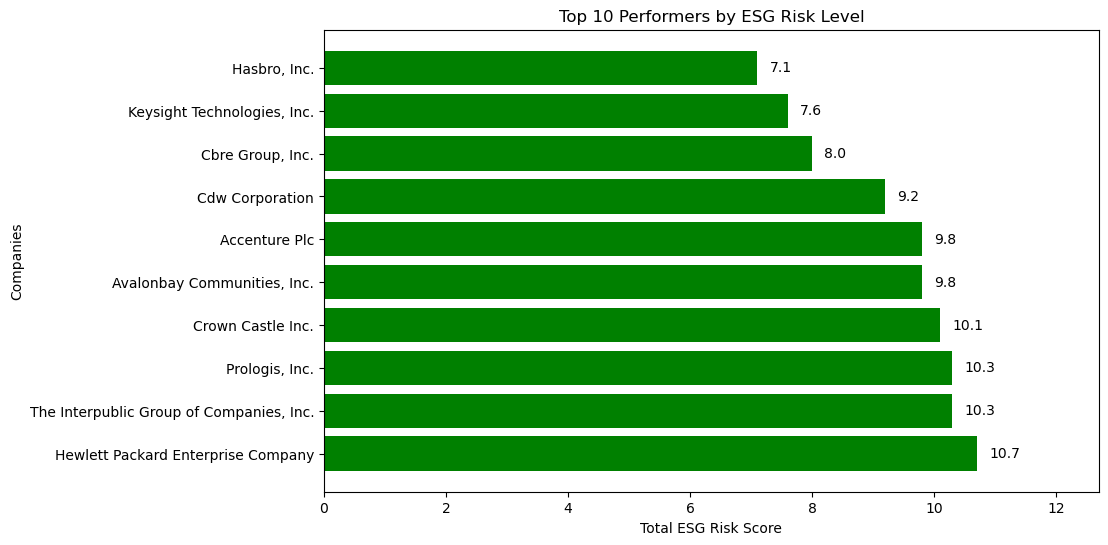

In [40]:
# Sort the data by 'Total ESG Risk score' in ascending order to get companies with the lowest ESG risk
top_performers = data.sort_values(by='Total ESG Risk score').head(10)

top_performers = top_performers.sort_values(by='Total ESG Risk score')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_performers['Name'], top_performers['Total ESG Risk score'], color='green')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Companies')
plt.title('Top 10 Performers by ESG Risk Level')
plt.xlim(0, top_performers['Total ESG Risk score'].max() + 2)  # +2 for better readability
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add annotations
for i, v in enumerate(top_performers['Total ESG Risk score']):
    plt.text(v + 0.2, i, str(v), color='black', verticalalignment='center')

# Show the plot
plt.show()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
447,BALL,Ball Corporation,"9200 West 108th Circle\nWestminster, CO 80021\...",Consumer Cyclical,Packaging & Containers,"16,000",Ball Corporation supplies aluminum packaging p...,12.1,7.6,3.7,0.8,Moderate Controversy Level,2.0,5th percentile,Low
450,AVY,Avery Dennison Corp.,"8080 Norton Parkway\nMentor, OH 44060\nUnited ...",Consumer Cyclical,Packaging & Containers,"35,000",Avery Dennison Corporation operates as a mater...,16.1,11.4,3.7,0.9,Low Controversy Level,1.0,14th percentile,Low
158,PKG,Packaging Corp of America,"1 North Field Court\nLake Forest, IL 60045\nUn...",Consumer Cyclical,Packaging & Containers,"14,900",Packaging Corporation of America manufactures ...,18.6,14.0,3.6,1.1,Low Controversy Level,1.0,23rd percentile,Low
492,APD,"Air Products & Chemicals, Inc.","1940 Air Products Boulevard\nAllentown, PA 181...",Basic Materials,Specialty Chemicals,"23,000","Air Products and Chemicals, Inc. provides atmo...",12.3,7.4,3.3,1.5,Low Controversy Level,1.0,5th percentile,Low
371,CCI,Crown Castle Inc.,"8020 Katy Freeway\nHouston, TX 77024-1908\nUni...",Real Estate,REIT - Specialty,"4,700","Crown Castle owns, operates and leases more th...",10.1,4.1,4.3,1.7,None Controversy Level,NaN,3rd percentile,Low
240,KEYS,"Keysight Technologies, Inc.","1400 Fountaingrove Parkway\nSanta Rosa, CA 954...",Technology,Scientific & Technical Instruments,"15,400","Keysight Technologies, Inc. provides electroni...",7.6,1.2,4.7,1.8,Low Controversy Level,1.0,1st percentile,Negligible
409,CBRE,"Cbre Group, Inc.","2100 McKinney Avenue\nSuite 1250\nDallas, TX 7...",Real Estate,Real Estate Services,"130,000","CBRE Group, Inc. operates as a commercial real...",8.0,1.5,4.6,1.9,Low Controversy Level,1.0,2nd percentile,Negligible
451,AVB,"Avalonbay Communities, Inc.","4040 Wilson Boulevard, Suite 1000\nArlington, ...",Real Estate,REIT - Residential,"2,978","As of December 31, 2023, the Company owned or ...",9.8,3.0,4.8,2.0,Low Controversy Level,1.0,3rd percentile,Negligible
221,LYB,Lyondellbasell Industries N.v. Class A,LyondellBasell Tower\nSuite 300 1221 McKinney ...,Basic Materials,Specialty Chemicals,"20,000",LyondellBasell Industries N.V. operates as a c...,20.7,13.5,5.1,2.1,Moderate Controversy Level,2.0,31st percentile,Medium
137,PLD,"Prologis, Inc.","Pier 1, Bay 1\nSan Francisco, CA 94111\nUnited...",Real Estate,REIT - Industrial,"2,574","Prologis, Inc. is the global leader in logisti...",10.3,2.7,5.0,2.5,Low Controversy Level,1.0,3rd percentile,Low


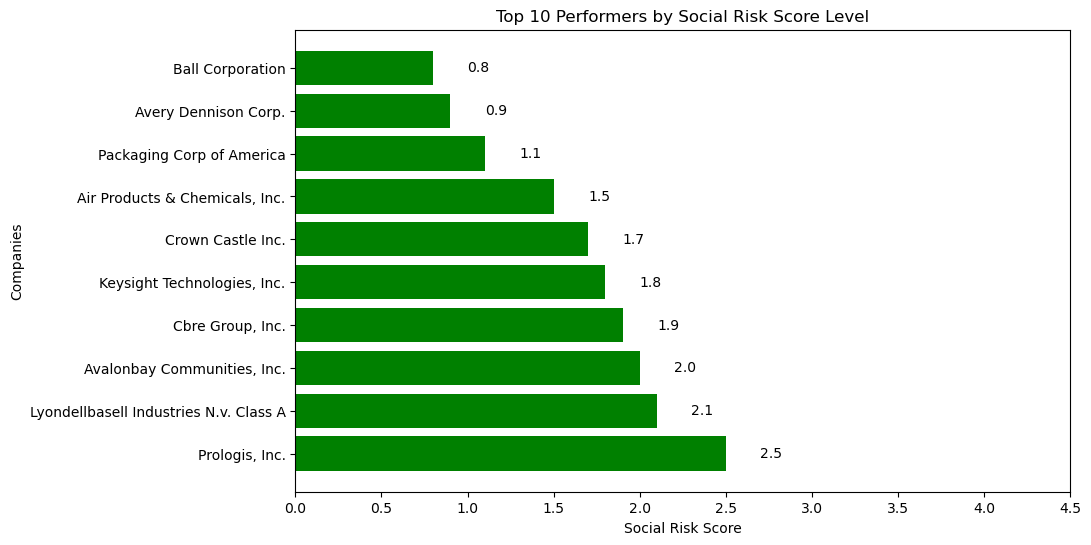

In [41]:
# Select a specific score to analyse:
# Total ESG Risk score 	Environment Risk Score 	Governance Risk Score 	Social Risk Score 	Controversy Score
scoreID = 'Social Risk Score'

# Sort the data by the selected score in ascending order to get companies with the lowest ESG risk
top_performers = data.sort_values(by=scoreID).head(10)

top_performers = top_performers.sort_values(by=scoreID)
display(top_performers)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_performers['Name'], top_performers[scoreID], color='green')
plt.xlabel(scoreID)
plt.ylabel('Companies')
plt.title('Top 10 Performers by ' + scoreID + ' Level')
plt.xlim(0, top_performers[scoreID].max() + 2)  # +2 for better readability
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add annotations
for i, v in enumerate(top_performers[scoreID]):
    plt.text(v + 0.2, i, str(v), color='black', verticalalignment='center')

# Show the plot
plt.show()

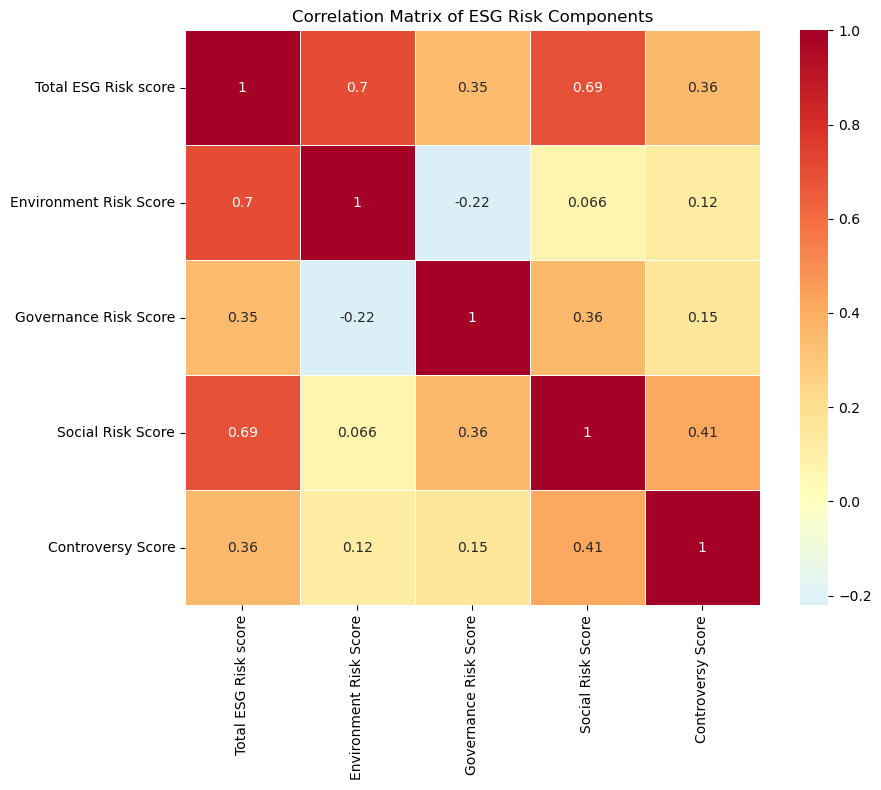

In [42]:
# 1. CORRELATION ANALYSIS BETWEEN ESG COMPONENTS
# Understand relationships between different ESG risk components
plt.figure(figsize=(10, 8))
esg_columns = ['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 
               'Social Risk Score', 'Controversy Score']
correlation_matrix = data[esg_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of ESG Risk Components')
plt.tight_layout()
plt.show()

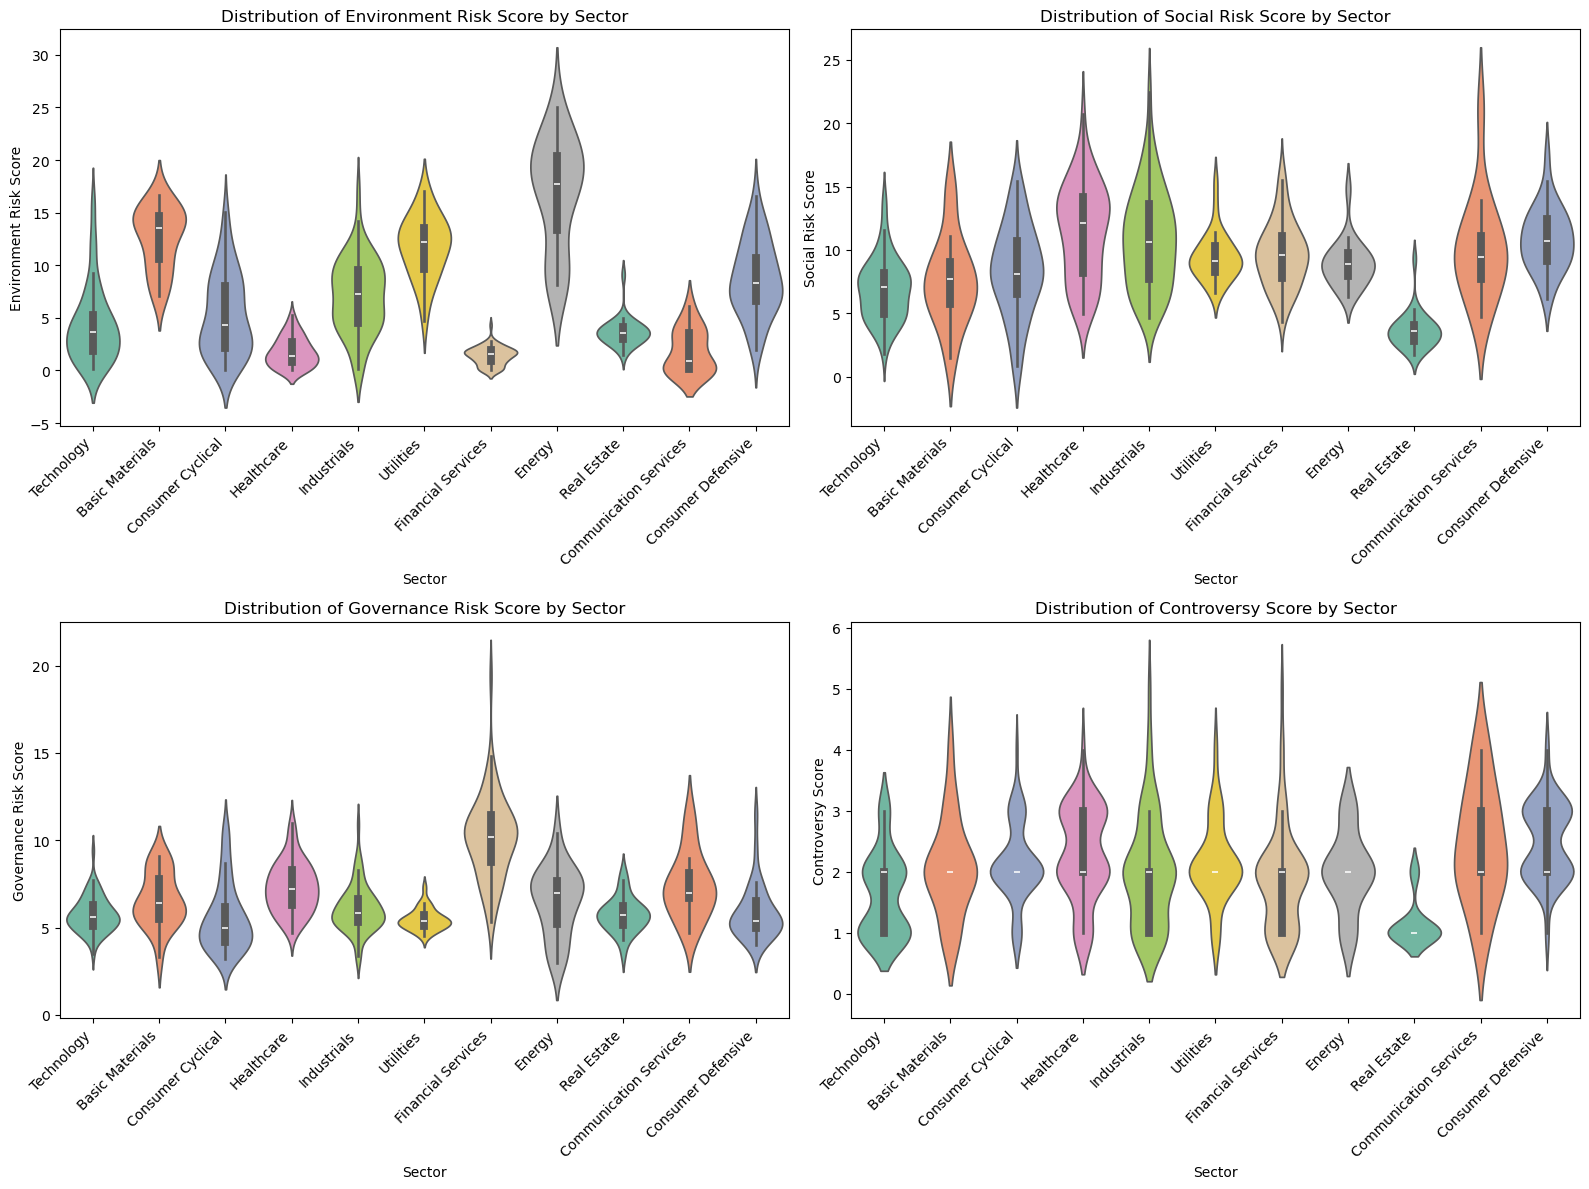

In [43]:
# 2. DISTRIBUTION ANALYSIS WITH VIOLIN PLOTS
# Show distribution patterns across sectors for multiple ESG components
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
esg_scores = ['Environment Risk Score', 'Social Risk Score', 
              'Governance Risk Score', 'Controversy Score']

for i, score in enumerate(esg_scores):
    ax = axes[i//2, i%2]
    sns.violinplot(data=data, x='Sector', y=score, ax=ax, palette='Set2')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Distribution of {score} by Sector')
    
plt.tight_layout()
plt.show()

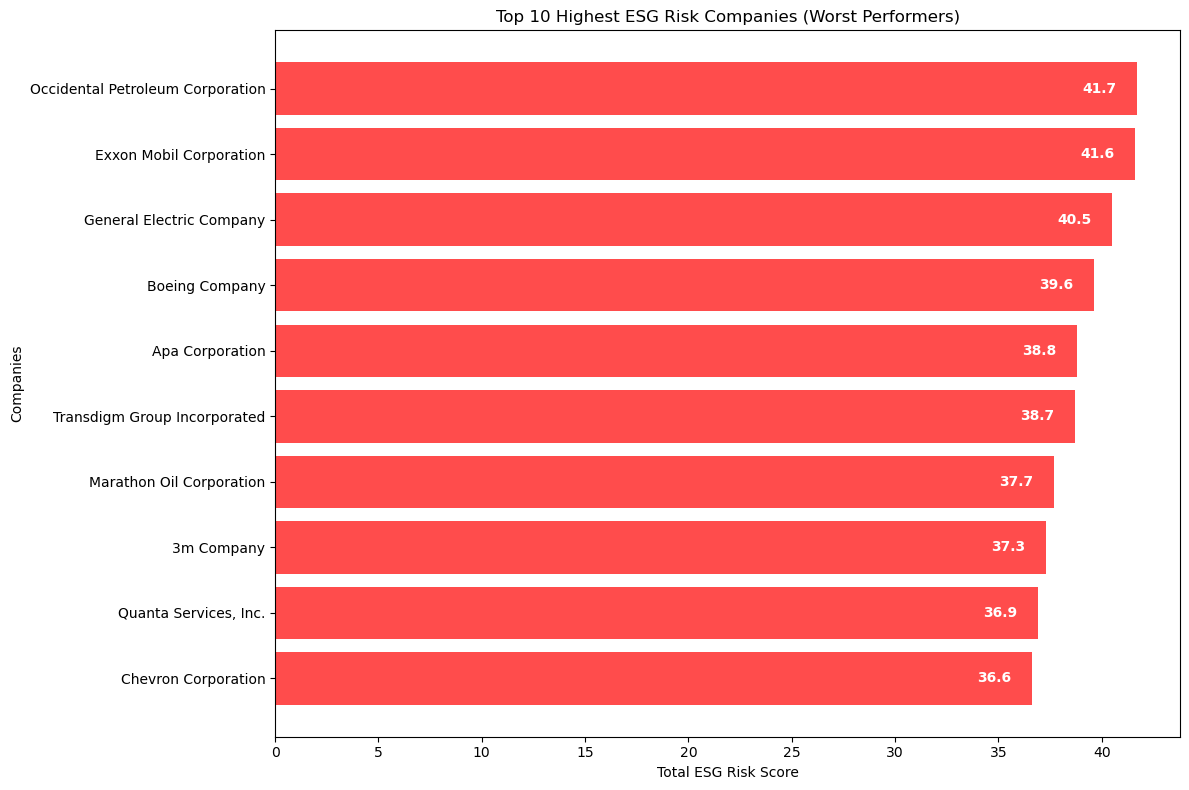

In [45]:
# 3. WORST PERFORMERS ANALYSIS
# Identify companies with highest ESG risks (complementing your top performers)
worst_performers = data.sort_values(by='Total ESG Risk score', ascending=False).head(10)
worst_performers = worst_performers.sort_values(by='Total ESG Risk score', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(worst_performers['Name'], worst_performers['Total ESG Risk score'], color='red', alpha=0.7)
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Companies')
plt.title('Top 10 Highest ESG Risk Companies (Worst Performers)')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(worst_performers['Total ESG Risk score']):
    plt.text(v - 1, i, f'{v:.1f}', color='white', verticalalignment='center', 
             horizontalalignment='right', fontweight='bold')

plt.tight_layout()
plt.show()

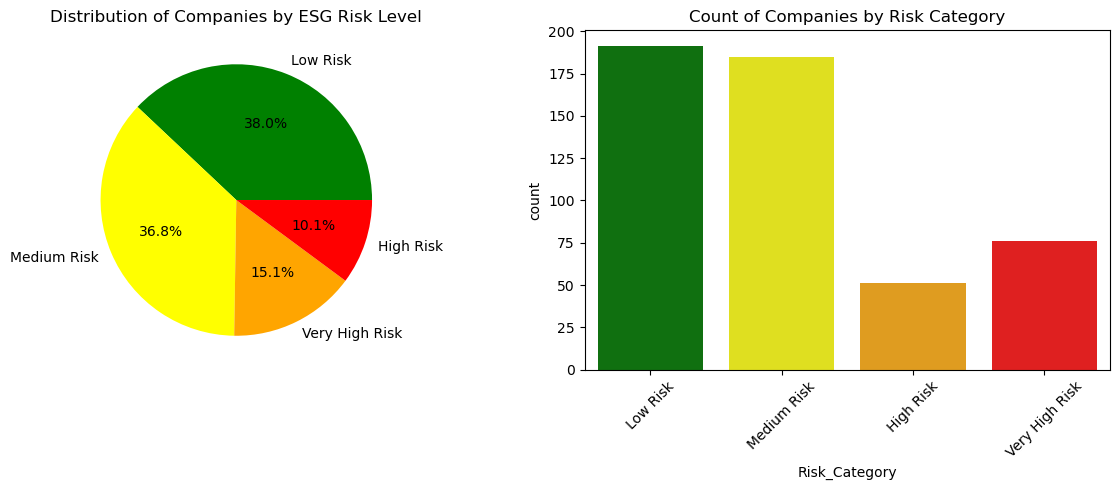

In [46]:
# 4. RISK LEVEL CATEGORIZATION
# Create risk categories and analyze distribution
def categorize_risk(score):
    if score < 20:
        return 'Low Risk'
    elif score < 30:
        return 'Medium Risk'
    elif score < 40:
        return 'High Risk'
    else:
        return 'Very High Risk'

data['Risk_Category'] = data['Total ESG Risk score'].apply(categorize_risk)

# Plot risk category distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
risk_counts = data['Risk_Category'].value_counts()
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', 
        colors=['green', 'yellow', 'orange', 'red'])
plt.title('Distribution of Companies by ESG Risk Level')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Risk_Category', order=['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk'],
              palette=['green', 'yellow', 'orange', 'red'])
plt.title('Count of Companies by Risk Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

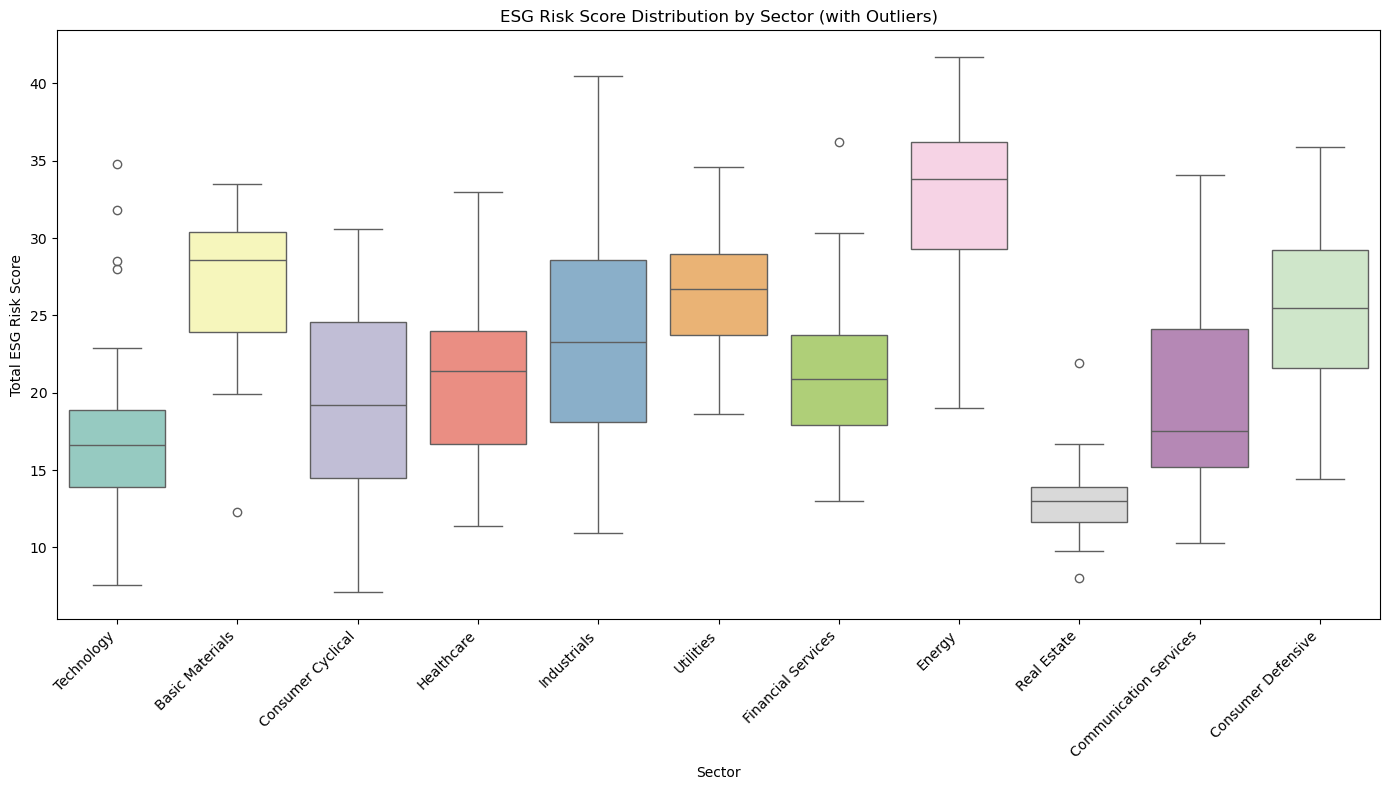

In [47]:
# 5. SECTOR COMPARISON WITH BOX PLOTS
# Better visualization of sector-wise risk distribution with outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Sector', y='Total ESG Risk score', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('ESG Risk Score Distribution by Sector (with Outliers)')
plt.ylabel('Total ESG Risk Score')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

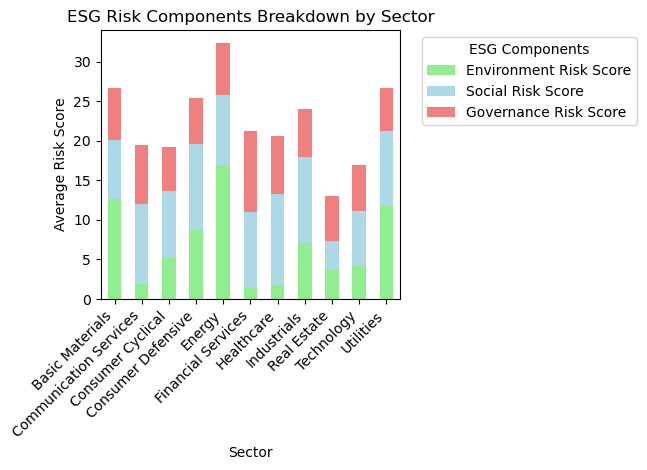

In [48]:
# 6. ESG COMPONENT BREAKDOWN BY SECTOR
# Stacked bar chart showing contribution of each ESG component by sector
sector_means = data.groupby('Sector')[['Environment Risk Score', 'Social Risk Score', 
                                       'Governance Risk Score']].mean()

plt.figure(figsize=(14, 8))
sector_means.plot(kind='bar', stacked=True, 
                 color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('ESG Risk Components Breakdown by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Risk Score')
plt.legend(title='ESG Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()